In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data=pd.read_csv(r'F:\Kaggle Data Sets\forest-cover-type-prediction\train.csv')

In [4]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train_data.shape

(15120, 56)

In [7]:
train_data['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [8]:
train_data.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
train_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

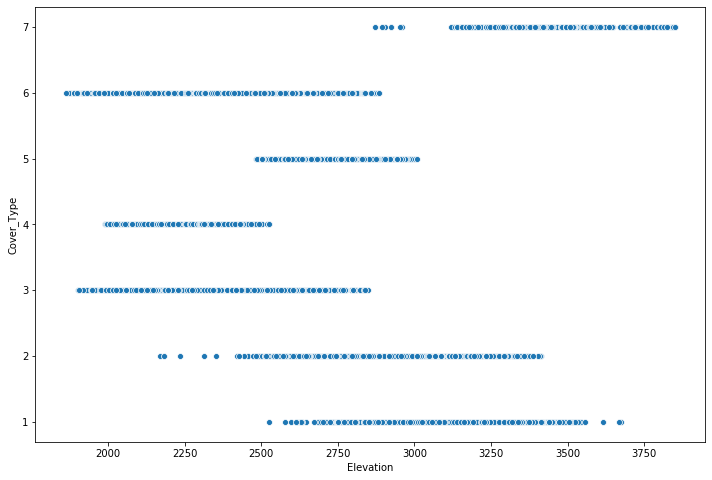

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Elevation',y='Cover_Type',data=train_data)

In [11]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['Id','Cover_Type'],axis=1)
y=train_data['Cover_Type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

## 1. RandomForest 

Feature: 0, Score: 0.22256
Feature: 1, Score: 0.04931
Feature: 2, Score: 0.03728
Feature: 3, Score: 0.06267
Feature: 4, Score: 0.05242
Feature: 5, Score: 0.09292
Feature: 6, Score: 0.05311
Feature: 7, Score: 0.04534
Feature: 8, Score: 0.04725
Feature: 9, Score: 0.07081
Feature: 10, Score: 0.01743
Feature: 11, Score: 0.00388
Feature: 12, Score: 0.01594
Feature: 13, Score: 0.04764
Feature: 14, Score: 0.00162
Feature: 15, Score: 0.00598
Feature: 16, Score: 0.01742
Feature: 17, Score: 0.01129
Feature: 18, Score: 0.00139
Feature: 19, Score: 0.00302
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00007
Feature: 23, Score: 0.02366
Feature: 24, Score: 0.00330
Feature: 25, Score: 0.00464
Feature: 26, Score: 0.00671
Feature: 27, Score: 0.00082
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00101
Feature: 30, Score: 0.00557
Feature: 31, Score: 0.00095
Feature: 32, Score: 0.00032
Feature: 33, Score: 0.00162
Feature: 34, Score: 0.00028
Feature: 35, Score: 0.00579
Fe

<BarContainer object of 54 artists>

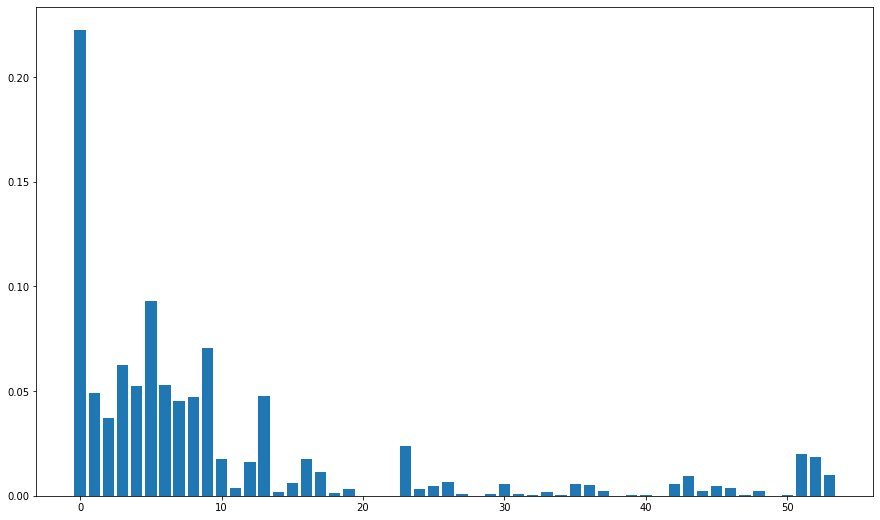

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
importance= rfc.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(15,9))
plt.bar([x for x in range(len(importance))],importance)


In [14]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix ->')
print(cm)
print('----------------------------------------------------------------------------------------------------')
print('Classification Report ->')
print(classification_report(y_test,y_pred))
print('----------------------------------------------------------------------------------------------------')
print('Accuracy Score ->',accuracy_score(y_test,y_pred))

Confusion Matrix ->
[[425  78   0   0   9   1  33]
 [115 350  19   0  36  11   5]
 [  0   1 450  32   5  66   0]
 [  0   0  12 541   0   3   0]
 [  1  11   3   0 482   4   0]
 [  0   4  62  14   2 482   0]
 [ 19   1   0   0   0   0 503]]
----------------------------------------------------------------------------------------------------
Classification Report ->
              precision    recall  f1-score   support

           1       0.76      0.78      0.77       546
           2       0.79      0.65      0.71       536
           3       0.82      0.81      0.82       554
           4       0.92      0.97      0.95       556
           5       0.90      0.96      0.93       501
           6       0.85      0.85      0.85       564
           7       0.93      0.96      0.95       523

    accuracy                           0.86      3780
   macro avg       0.85      0.86      0.85      3780
weighted avg       0.85      0.86      0.85      3780

---------------------------------------

## 2. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred_dtc)
print('Confusion Matrix ->')
print()
print(cm)
print('----------------------------------------------------------------------------------------------------')
print('Classification Report ->')
print()
print(classification_report(y_test,y_pred_dtc))
print('----------------------------------------------------------------------------------------------------')
print('Accuracy Score ->',accuracy_score(y_test,y_pred_dtc))

Confusion Matrix ->

[[368 121   0   0   6   2  49]
 [143 302  19   0  48  15   9]
 [  0   7 422  22  16  87   0]
 [  0   0  25 515   0  16   0]
 [ 14  41   1   0 437   8   0]
 [  0  18  88  12   8 438   0]
 [ 42   7   0   0   0   0 474]]
----------------------------------------------------------------------------------------------------
Classification Report ->

              precision    recall  f1-score   support

           1       0.65      0.67      0.66       546
           2       0.61      0.56      0.59       536
           3       0.76      0.76      0.76       554
           4       0.94      0.93      0.93       556
           5       0.85      0.87      0.86       501
           6       0.77      0.78      0.78       564
           7       0.89      0.91      0.90       523

    accuracy                           0.78      3780
   macro avg       0.78      0.78      0.78      3780
weighted avg       0.78      0.78      0.78      3780

-------------------------------------

## 3. KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#Using standard sacler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_data.drop(['Id','Cover_Type'],axis=1))
scaled_features=scaler.transform(train_data.drop(['Id','Cover_Type'],axis=1))
X_scaled=pd.DataFrame(scaled_features,columns=train_data.drop(['Id','Cover_Type'],axis=1).columns)

In [34]:
X_scaled.head()
y_scaled=train_data['Cover_Type']

In [35]:
X_scaled_train,X_scaled_test,y_scaled_train,y_scaled_test=train_test_split(X_scaled,y_scaled,test_size=0.25,random_state=12)

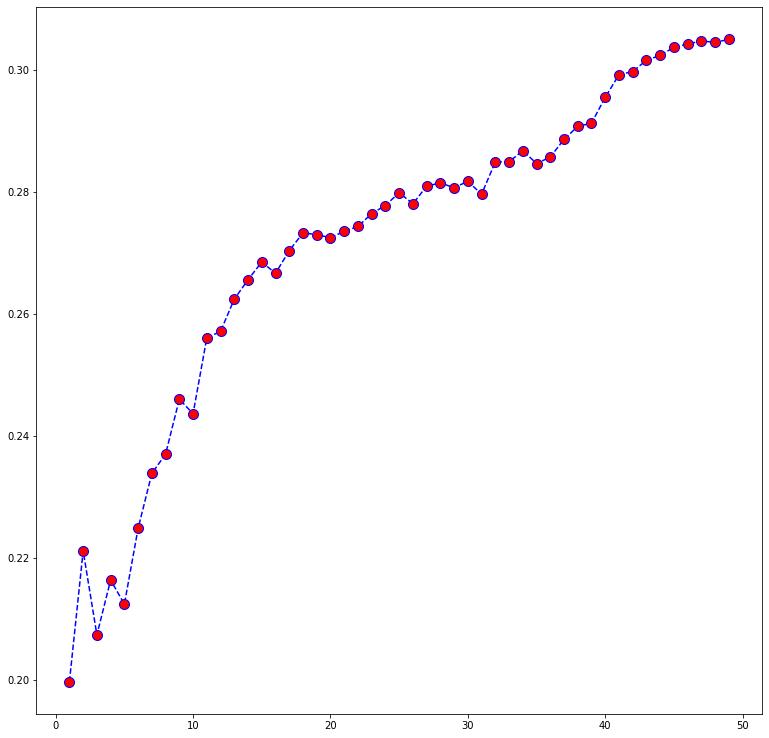

In [36]:
error=list()
for i in range(1,50):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_scaled_train,y_scaled_train)
    y_pred_i=knn_i.predict(X_scaled_test)
    error.append(np.mean(y_pred_i!=y_scaled_test))
plt.figure(figsize=(13,13))
plt.plot(range(1,50),error,linestyle='dashed',color='blue',marker='o',markerfacecolor='red',markersize=10)

In [37]:
knn_1=KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_scaled_train,y_scaled_train)
y_pred_knn=knn_1.predict(X_scaled_test)

cm=confusion_matrix(y_scaled_test,y_pred_knn)
print('Confusion Matrix ->')
print()
print(cm)
print('----------------------------------------------------------------------------------------------------')
print('Classification Report ->')
print()
print(classification_report(y_scaled_test,y_pred_knn))
print('----------------------------------------------------------------------------------------------------')
print('Accuracy Score ->',accuracy_score(y_scaled_test,y_pred_knn))

Confusion Matrix ->

[[372 121   0   0  16   2  35]
 [133 314  17   1  48  15   8]
 [  0   3 392  40   9 110   0]
 [  0   0  23 515   0  18   0]
 [  6  16   3   0 474   2   0]
 [  1  11  67  21   8 456   0]
 [ 17   4   0   0   0   0 502]]
----------------------------------------------------------------------------------------------------
Classification Report ->

              precision    recall  f1-score   support

           1       0.70      0.68      0.69       546
           2       0.67      0.59      0.62       536
           3       0.78      0.71      0.74       554
           4       0.89      0.93      0.91       556
           5       0.85      0.95      0.90       501
           6       0.76      0.81      0.78       564
           7       0.92      0.96      0.94       523

    accuracy                           0.80      3780
   macro avg       0.80      0.80      0.80      3780
weighted avg       0.80      0.80      0.80      3780

-------------------------------------

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr_prob=lr.predict_proba(X_test)

F:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


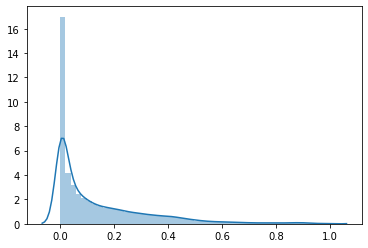

In [39]:
sns.distplot(y_pred_lr_prob)

In [41]:
cm=confusion_matrix(y_test,y_pred_lr)
print('Confusion Matrix ->')
print()
print(cm)
print('----------------------------------------------------------------------------------------------------')
print('Classification Report ->')
print()
print(classification_report(y_test,y_pred_lr))
print('----------------------------------------------------------------------------------------------------')
print('Accuracy Score ->',accuracy_score(y_test,y_pred_lr))

Confusion Matrix ->

[[235  82   2   0  61  11 155]
 [106 206  15   1 100  50  58]
 [  3  49 189 130  57 123   3]
 [  0   4  64 436  18  34   0]
 [ 25  87  21   1 252  95  20]
 [ 12  63 163  77  99 143   7]
 [150  28   2   0   6   0 337]]
----------------------------------------------------------------------------------------------------
Classification Report ->

              precision    recall  f1-score   support

           1       0.44      0.43      0.44       546
           2       0.40      0.38      0.39       536
           3       0.41      0.34      0.37       554
           4       0.68      0.78      0.73       556
           5       0.42      0.50      0.46       501
           6       0.31      0.25      0.28       564
           7       0.58      0.64      0.61       523

    accuracy                           0.48      3780
   macro avg       0.46      0.48      0.47      3780
weighted avg       0.46      0.48      0.47      3780

-------------------------------------

### Thus, it is clear to use RandomForestClassifier which has highest accuracy score of 0.85

In [43]:
test_data=pd.read_csv(r'F:\Kaggle Data Sets\forest-cover-type-prediction\test.csv')
sample=pd.read_csv(r'F:\Kaggle Data Sets\forest-cover-type-prediction\sampleSubmission.csv')
X_train=X
y_train=y

In [44]:
sample.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [45]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_test=test_data.drop(['Id'],axis=1)

In [47]:
print('Test Shape ->',X_train.shape)
print('Train Shape ->',X_train.shape)

Test Shape -> (15120, 54)
Train Shape -> (15120, 54)


In [48]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_test_pred=rfc.predict(X_test)

In [49]:
import csv
filename='output.csv'
fields=['Id','Cover_Type']

row=list()

for i in test_data.index:
    row_i=[test_data.loc[i,'Id'],y_test_pred[i]]
    row.append(row_i)
    
row=np.array(row)

with open(filename,'w',newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(row)
